In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5406-E810

 Directory of C:\Users\Admin\assignment\decision tree

14-10-2021  17:57    <DIR>          .
14-10-2021  17:57    <DIR>          ..
14-10-2021  17:07    <DIR>          .ipynb_checkpoints
14-10-2021  17:04            17,023 Company_Data.csv
14-10-2021  17:04            21,837 Fraud_check.csv
14-10-2021  17:04             1,377 problem statement(company data).txt
14-10-2021  17:04               460 Problem_statement(Fraudcheck).txt
14-10-2021  17:57            46,207 Untitled.ipynb
               5 File(s)         86,904 bytes
               3 Dir(s)  38,461,657,088 bytes free


In [3]:
fraud=pd.read_csv('Fraud_check.csv')

In [4]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
fraud.loc[fraud['Taxable.Income'] <=30000,'Taxable_Income']= 'Risky'
fraud.loc[fraud['Taxable.Income'] >30000,'Taxable_Income']= 'Good'

In [6]:
fraud.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [7]:
fraud.drop('Taxable.Income',inplace=True,axis=1)

In [8]:
fraud.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good


In [9]:
fraud['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [10]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Taxable_Income   600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [11]:
label_encoder=preprocessing.LabelEncoder()
fraud['Marital.Status']=label_encoder.fit_transform(fraud['Marital.Status'])

In [12]:
fraud['Marital.Status'].unique()

array([2, 0, 1])

In [13]:
fraud.Undergrad.value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [14]:
fraud['Undergrad']=label_encoder.fit_transform(fraud['Undergrad'])

In [15]:
fraud.Undergrad.unique()

array([0, 1])

In [16]:
fraud.Urban.value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [17]:
fraud['Urban']=label_encoder.fit_transform(fraud['Urban'])

In [18]:
fraud.Urban.unique()

array([1, 0])

In [19]:
fraud.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good


In [20]:
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]

In [21]:
target

'Taxable_Income'

In [22]:
predictors

['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']

In [23]:
train,test = train_test_split(fraud,test_size = 0.2, random_state=1)

In [24]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(train[predictors],train[target])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

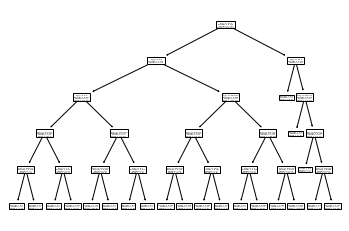

In [25]:
tree.plot_tree(model);

In [26]:
preds = model.predict(test[predictors])

In [27]:
pd.Series(preds).value_counts()
pd.crosstab(test[target],preds)

col_0,Good,Risky
Taxable_Income,,
Good,89,8
Risky,22,1


In [28]:
np.mean(preds==test[target])

0.75